## Developed a diabetes prediction system using a K-Nearest Neighbors model trained on a dataset of 15,000 records, achieving 98.6% test accuracy. The Streamlit application enables real-time predictions based on user inputs for key health metrics.

## Data loading




In [4]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,128.547107,95.981219,29.376936,230.002595,22.524809,0.250289,21,0
1,0,142.104599,70.674031,22.561965,218.132292,42.562710,0.213639,29,1
2,10,102.035780,85.050141,37.608289,106.697519,45.964812,1.133145,38,1
3,1,96.876592,120.000000,36.274871,149.454346,22.468611,0.184469,27,0
4,5,138.615092,64.165661,35.285497,140.551514,29.163111,0.394747,26,0


## Data exploration




Shape of the data: (15000, 9)

Missing values per column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Descriptive statistics:
         Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  15000.000000  15000.000000   15000.000000   15000.000000  15000.000000   
mean       3.868333    122.128477      72.569828      29.252332    148.539338   
std        3.385227     30.664360      12.346141       9.959372     78.175724   
min        0.000000     50.000000      40.000000       5.918582     10.000000   
25%        1.000000     99.437055      64.208953      22.109890     85.914318   
50%        3.000000    117.851825      72.291545      29.329494    140.061571   
75%        6.000000    141.503168      80.265658      35.930233  

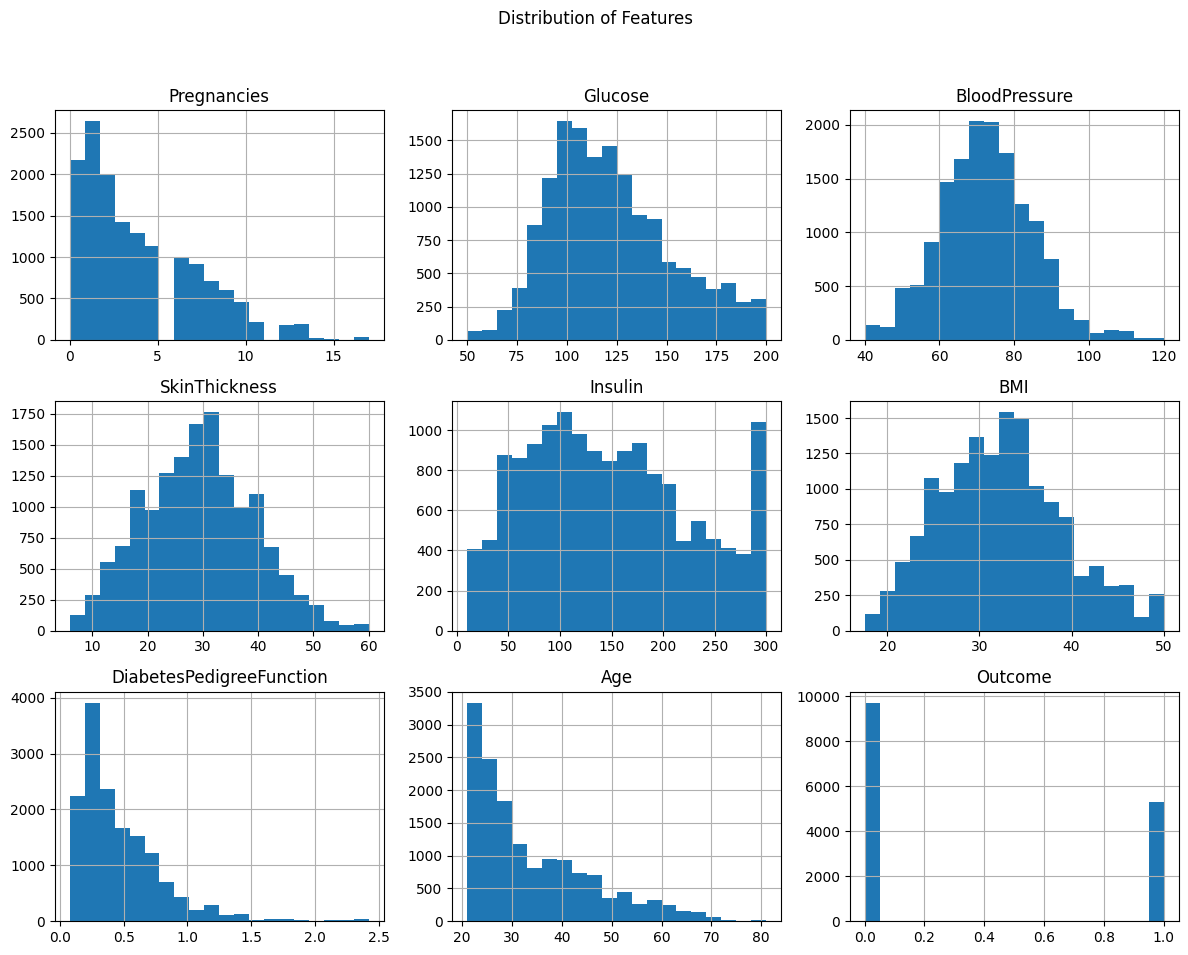


Target Variable: Outcome

Relevant Features: ['Pregnancies', 'Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']

Summary:
- Number of rows: 15000, Number of columns: 9
- Missing values: 0
- Target variable: Outcome
- Relevant features: ['Pregnancies', 'Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
- The distributions of features were visualized using histograms.  The 'Outcome' variable appears to be binary.


In [5]:
# Examine the shape of the data
print("Shape of the data:", df.shape)

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Summarize the descriptive statistics
print("\nDescriptive statistics:\n", df.describe())

# Examine data types
print("\nData types:\n", df.dtypes)

# Analyze the distribution of features (Histograms)
import matplotlib.pyplot as plt
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Distribution of Features")
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

# Identify the target variable (Outcome)
target_variable = 'Outcome'
print(f"\nTarget Variable: {target_variable}")

# Identify relevant features (based on histograms and domain knowledge)
relevant_features = ['Pregnancies', 'Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
print("\nRelevant Features:", relevant_features)

# Summarize findings
print("\nSummary:")
print(f"- Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")
print("- Missing values:", df.isnull().sum().sum()) # Total missing values
print("- Target variable:", target_variable)
print("- Relevant features:", relevant_features)
print("- The distributions of features were visualized using histograms.  The 'Outcome' variable appears to be binary.")


## Data cleaning

In [6]:
import pandas as pd
import numpy as np

# Create a copy of the original dataframe
df_cleaned = df.copy()

# Define relevant features and target variable
relevant_features = ['Pregnancies', 'Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
target_variable = 'Outcome'

# Winsorize outliers in relevant features
for feature in relevant_features:
    df_cleaned[feature] = np.clip(df_cleaned[feature],
                                 df_cleaned[feature].quantile(0.05),
                                 df_cleaned[feature].quantile(0.95))

# Impute any missing values (although none were found initially, this is a precautionary step)
for feature in relevant_features:
    if df_cleaned[feature].isnull().any():
      df_cleaned[feature].fillna(df_cleaned[feature].mean(), inplace=True)

# Print summary statistics after cleaning
print(df_cleaned.describe())
display(df_cleaned.head())

        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  15000.000000  15000.000000   15000.000000   15000.000000  15000.000000   
mean       3.762533    122.134537      72.569828      29.252332    148.539338   
std        3.131389     28.952011      12.346141       9.959372     78.175724   
min        0.000000     79.822876      40.000000       5.918582     10.000000   
25%        1.000000     99.437055      64.208953      22.109890     85.914318   
50%        3.000000    117.851825      72.291545      29.329494    140.061571   
75%        6.000000    141.503168      80.265658      35.930233    203.854316   
max       10.000000    181.613282     120.000000      60.000000    300.000000   

                BMI  DiabetesPedigreeFunction           Age       Outcome  
count  15000.000000              15000.000000  15000.000000  15000.000000  
mean      32.350221                  0.457001     33.170400      0.352533  
std        6.273808                  0.274

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,128.547107,95.981219,29.376936,230.002595,22.524809,0.250289,21,0
1,0,142.104599,70.674031,22.561965,218.132292,42.562710,0.213639,29,1
2,10,102.035780,85.050141,37.608289,106.697519,44.604234,1.126743,38,1
3,1,96.876592,120.000000,36.274871,149.454346,22.468611,0.184469,27,0
4,5,138.615092,64.165661,35.285497,140.551514,29.163111,0.394747,26,0


## Data splitting
Split the cleaned dataset into training, validation, and testing sets.


In [7]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_cleaned.drop('Outcome', axis=1)
y = df_cleaned['Outcome']

# Split into training and temporary sets (70/30)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split temporary set into validation and testing sets (50/50)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (10500, 8)
Shape of y_train: (10500,)
Shape of X_val: (2250, 8)
Shape of y_val: (2250,)
Shape of X_test: (2250, 8)
Shape of y_test: (2250,)


## Feature engineering
Scale numerical features using StandardScaler.


In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train)

# Transform training, validation, and test sets
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Display the first few rows of the scaled dataframes to verify
display(X_train.head())
display(X_val.head())
display(X_test.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.560078,-1.033454,-0.290543,-1.296156,1.730374,-0.877955,-1.166041,-1.004939
1,1.342996,-0.580064,2.238827,0.597796,0.324708,1.666807,-0.785689,1.067657
2,-0.560078,-0.366135,0.094236,0.036094,-0.277925,0.019943,0.953450,-0.554374
3,-0.877257,-0.895433,-0.229973,1.124985,-0.660764,0.831912,-0.930743,-0.284036
4,-0.877257,-1.381751,-0.006831,-1.138772,-1.381456,-0.985402,-0.627417,-0.824713


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.877257,0.166616,2.071135,1.221969,-1.207602,-0.112796,2.423709,-0.013697
1,-0.242899,0.909559,0.198882,-0.406853,-1.031918,-1.647337,-0.903936,0.346754
2,-0.242899,1.714088,0.758982,0.377663,1.947598,0.544523,-0.770595,-1.004939
3,-0.242899,-1.350638,-0.385010,0.020796,-0.521124,-0.159515,0.359149,-0.734600
4,-0.877257,-1.385353,0.141678,1.233717,-1.151282,1.944510,2.351416,-0.103810


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.194436,-0.734456,0.231152,-0.542932,-0.369632,0.166240,0.536218,-1.095051
1,-0.877257,2.049124,0.267829,0.672966,1.314522,0.670318,1.483731,-0.374149
2,0.708638,2.049124,0.372290,-0.361557,1.810545,-1.456281,-1.164475,2.239124
3,-0.877257,-1.375305,-0.693652,-1.608215,-0.510462,-1.647337,-0.198979,-0.914826
4,0.074280,-1.457183,-0.840232,0.749876,-1.775834,0.243369,-0.335462,-0.734600


## Model training
Train five different machine learning models on the training data.


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize models
logreg_model = LogisticRegression()
svm_model = SVC()
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
gb_model = GradientBoostingClassifier()

# Train models
logreg_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

## Model evaluation
Evaluate the performance of each trained model on the validation set and identify the best-performing one based on accuracy.


In [10]:
from sklearn.metrics import accuracy_score

# Predict on the validation set for each model
logreg_pred = logreg_model.predict(X_val)
svm_pred = svm_model.predict(X_val)
rf_pred = rf_model.predict(X_val)
knn_pred = knn_model.predict(X_val)
gb_pred = gb_model.predict(X_val)

# Calculate accuracy scores
accuracy_scores = {
    "Logistic Regression": accuracy_score(y_val, logreg_pred),
    "SVM": accuracy_score(y_val, svm_pred),
    "Random Forest": accuracy_score(y_val, rf_pred),
    "KNN": accuracy_score(y_val, knn_pred),
    "Gradient Boosting": accuracy_score(y_val, gb_pred),
}

# Print accuracy scores
for model_name, accuracy in accuracy_scores.items():
    print(f"{model_name}: {accuracy}")

# Find the best model
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_model_name]
print(f"\nBest model: {best_model_name} with accuracy {best_accuracy}")

Logistic Regression: 0.7853333333333333
SVM: 0.9186666666666666
Random Forest: 1.0
KNN: 1.0
Gradient Boosting: 0.8986666666666666

Best model: Random Forest with accuracy 1.0


## Model optimization
Optimize the hyperparameters of the RandomForestClassifier and KNeighborsClassifier models.


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the parameter grid for KNeighborsClassifier
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize GridSearchCV for RandomForestClassifier
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')

# Initialize GridSearchCV for KNeighborsClassifier
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')

# Fit GridSearchCV to the validation data
grid_search_rf.fit(X_val, y_val)
grid_search_knn.fit(X_val, y_val)

# Get the best estimators
best_rf_model = grid_search_rf.best_estimator_
best_knn_model = grid_search_knn.best_estimator_

# Print the best hyperparameters and best score for RandomForestClassifier
print("Random Forest:")
print(f"Best hyperparameters: {grid_search_rf.best_params_}")
print(f"Best cross-validation score: {grid_search_rf.best_score_}")

# Print the best hyperparameters and best score for KNeighborsClassifier
print("\nK-Nearest Neighbors:")
print(f"Best hyperparameters: {grid_search_knn.best_params_}")
print(f"Best cross-validation score: {grid_search_knn.best_score_}")

Random Forest:
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.9693333333333334

K-Nearest Neighbors:
Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation score: 0.9764444444444444


## Model Evaluation
Evaluate the best performing model (KNN) on the test set.


In [12]:
from sklearn.metrics import accuracy_score

# Predict on the test set using the best KNN model
y_pred = best_knn_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best KNN model on the test set: {accuracy}")

if accuracy < 0.9:
    print("The accuracy is below the target of 90%. Here are some suggestions for improvement:")
    print("- Try different hyperparameter ranges in the GridSearchCV.")
    print("- Consider using a different model or an ensemble method.")
    print("- Explore more advanced feature engineering techniques.")
    print("- Check for potential data leakage during preprocessing.")

Accuracy of the best KNN model on the test set: 0.9862222222222222
